In [7]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [8]:
# summary of data
print('data size = ', digits.data.shape)
print('target size = ', digits.target.shape)
print(digits.DESCR)

data size =  (1797, 64)
target size =  (1797,)
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and 

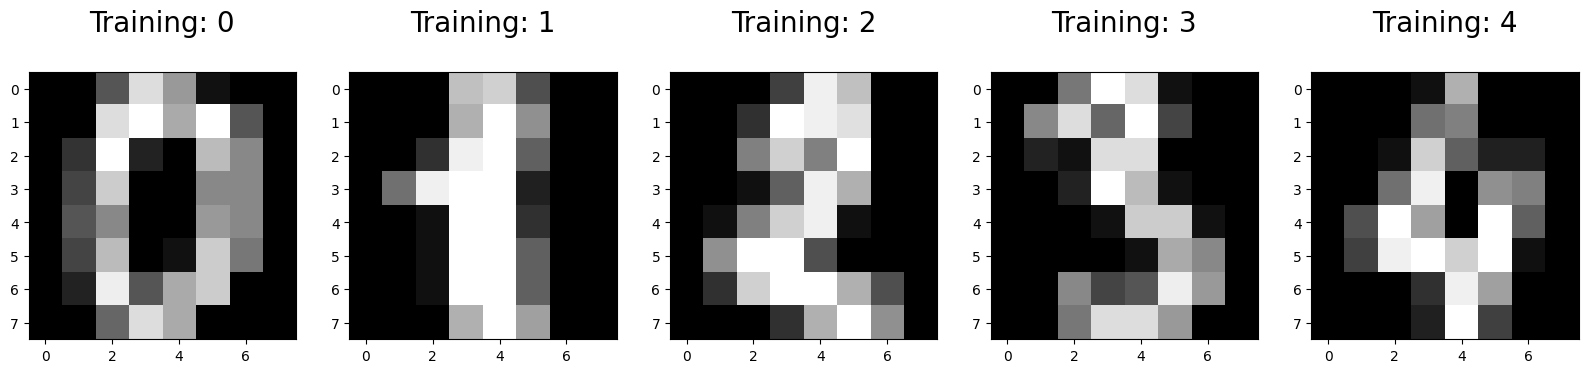

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# show examples of dataset
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [10]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=8)
print(X_train[256], y_train[256])

[ 0.  0.  2. 16. 10.  0.  0.  0.  0.  0.  4. 16. 16.  5.  0.  0.  0.  0.
  8. 16. 16.  3.  0.  0.  0.  0.  9. 16. 16.  3.  0.  0.  0.  0.  8. 16.
 16.  3.  0.  0.  0.  0.  8. 16. 16.  1.  0.  0.  0.  0.  5. 16. 14.  0.
  0.  0.  0.  0.  1. 12. 16.  3.  0.  0.] 1


In [ ]:
# 2 batch gradient descent (GD) for Logistic regression
def LogisticRegression_GD(X_train, y_train, learning_rate):
    #TODO
    def compute_logits(X, W, b):
        logits = np.dot(X, W) + b
        logits_max = np.max(logits, axis=1, keepdims=True)
        logits_modified = logits - logits_max
        return logits_modified

    def compute_probabilities(logits_modified):
        exp_logits = np.exp(logits_modified)
        sum_exp_logits = np.sum(exp_logits, axis=1, keepdims=True)
        probabilities = exp_logits / sum_exp_logits
        return probabilities

    # initialize parameters
    n_samples, n_features = X_train.shape
    n_classes = len(np.unique(y_train))
    W = np.zeros((n_features, n_classes))
    b = np.zeros(n_classes)

    # initialize loss list
    loss = []

    # perform gradient descent
    epsilon = 1.0e-4
    eta = 0.1
    prev_loss = float('inf')
    t = 0

    while True:
        logits_modified = compute_logits(X_train, W, b)

        probabilities = compute_probabilities(logits_modified)

        one_hot_y = np.zeros((n_samples, n_classes))
        one_hot_y[np.arange(n_samples), y_train] = 1
        current_loss = -np.sum(one_hot_y * np.log(probabilities)) / n_samples + 0.5 * eta * np.sum(W * W)

        # current_loss = np.mean(-np.log(probabilities)) + (eta / 2) * np.sum(W**2)

        loss.append(current_loss)

        if np.abs(current_loss - prev_loss) <= epsilon:
            break

        prev_loss = current_loss

        gradient = np.dot(X_train.T, (probabilities - one_hot_y)) / n_samples + eta * W
        W -= learning_rate * gradient
        b -= learning_rate * np.sum(probabilities - one_hot_y, axis=0) / n_samples

        # update parameters
        # gradients_W = np.mean((np.dot(X_train.T, (probabilities - np.eye(n_classes)[y_train]))), axis=0) + eta * W
        # gradients_b = np.mean(probabilities - np.eye(n_classes)[y_train], axis=0)
        # W -= learning_rate * gradients_W
        # b -= learning_rate * gradients_b

        t += 1

    return W, b, loss

---------------------------------------
learning rate = 0.005
Loss: 0.1898597330586415
training precision = 0.9747587230883444
test precision = 0.9644444444444444
---------------------------------------
learning rate = 0.01
Loss: 0.18031309420973188
training precision = 0.9769858945805494
test precision = 0.9666666666666667
---------------------------------------
learning rate = 0.05
Loss: 0.22027942044295779
training precision = 0.9799554565701559
test precision = 0.9622222222222222


Text(0, 0.5, 'loss')

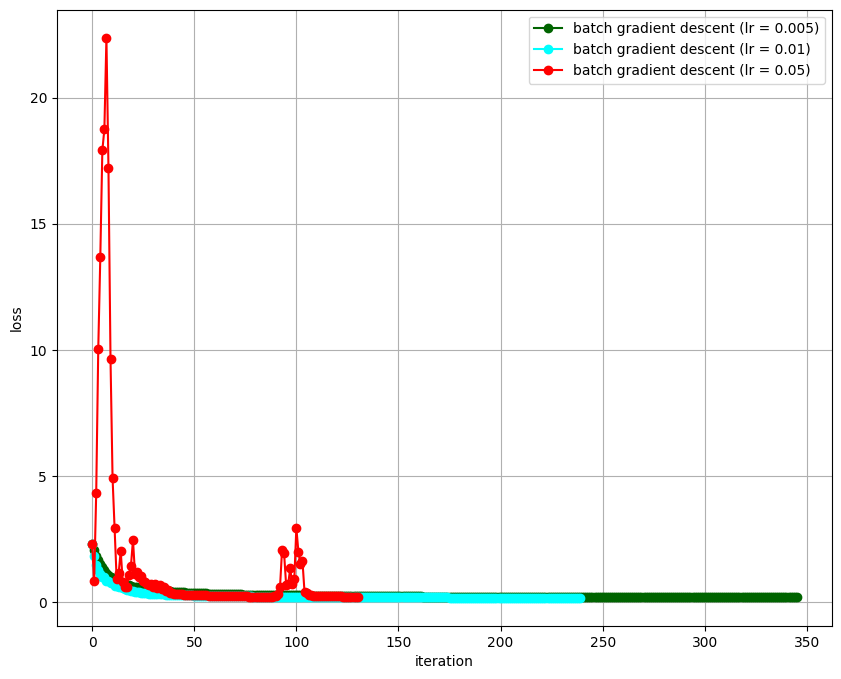

In [ ]:
# evaluation of different learning rate
learning_rate = [5.0e-3, 1.0e-2, 5.0e-2]
cl = ['darkgreen', 'cyan', 'red']
fig, ax = plt.subplots(figsize=(10, 8))
for i in range(len(learning_rate)):

    print('---------------------------------------')
    print('learning rate =', learning_rate[i])

    W, b, loss_GD = LogisticRegression_GD(X_train, y_train, learning_rate[i])

    print('Loss:', loss_GD[-1])

    #TODO
    logits_modified_train = compute_logits(X_train, W, b)
    probabilities_train = compute_probabilities(logits_modified_train)
    y_pred_train = np.argmax(probabilities_train, axis=1)
    prec_train = np.mean(y_pred_train == y_train)
    print('training precision =', prec_train)

    #TODO
    logits_modified_test = compute_logits(X_test, W, b)
    probabilities_test = compute_probabilities(logits_modified_test)
    y_pred_test = np.argmax(probabilities_test, axis=1)
    prec_test = np.mean(y_pred_test == y_test)
    print('test precision =', prec_test)

    plt.plot(loss_GD, c = cl[i], ls = '-', marker = 'o', label = 'batch gradient descent (lr = ' + str(learning_rate[i]) + ')')

plt.grid()
plt.legend()
plt.xlabel('iteration')
plt.ylabel('loss')

In [11]:
# 4 stochastic gradient descent (SGD) for Logistic regression
import random

def LogisticRegression_SGD(X, y, batch_size, lr=1.0e-2, eta=2.0e-1, eps = 1.0e-4, max_epoch=500):

    #TODO: initialization
    notstop = True
    epoch = 0
    loss = []

    n_samples, n_features = X.shape
    n_classes = len(np.unique(y))
    W = np.zeros((n_features, n_classes))
    b = np.zeros(n_classes)

    def compute_logits(X, W, b):
        logits = np.dot(X, W) + b
        logits_max = np.max(logits, axis=1, keepdims=True)
        logits_modified = logits - logits_max
        return logits_modified

    def compute_probabilities(logits_modified):
        exp_logits = np.exp(logits_modified)
        sum_exp_logits = np.sum(exp_logits, axis=1, keepdims=True)
        probabilities = exp_logits / sum_exp_logits
        return probabilities

    # optimization loop
    while notstop and epoch < max_epoch:

        #TODO: SGD of each epoch
        # Shuffle data indices
        shuffled_indices = random.sample(range(len(X)), len(X))
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, len(X), batch_size):
            X_mini_batch = X_shuffled[i:i+batch_size]
            y_mini_batch = y_shuffled[i:i+batch_size]

            logits_modified = compute_logits(X_mini_batch, W, b)

            probabilities = compute_probabilities(logits_modified)

            one_hot_y = np.zeros((len(X_mini_batch), n_classes))
            one_hot_y[np.arange(len(X_mini_batch)), y_mini_batch] = 1

            current_loss = -np.sum(one_hot_y * np.log(probabilities)) / len(X_mini_batch) + 0.5 * eta * np.sum(W * W)

            # current_loss = np.mean(-np.log(probabilities)) + (eta / 2) * np.sum(W**2)

            loss.append(current_loss)

            # half lr if not improving in 10 epochs
            if epoch > 10:
                if loss[epoch - 10] <= loss[epoch] - eps:
                    lr *= 0.5
                    print('reduce learning rate to', lr)

            # stop if not improving in 20 epochs
            if epoch > 20:
                if loss[epoch - 20] <= loss[epoch] - eps or abs(loss[epoch] - loss[epoch-1]) <= eps:
                    notstop = False
                    break

            epoch += 1

            #TODO: W and b
            gradient = np.dot(X_mini_batch.T, (probabilities - one_hot_y)) / n_samples + eta * W
            W -= lr * gradient
            b -= lr * np.sum(probabilities - one_hot_y, axis=0) / n_samples

            # gradients_W = np.mean((np.dot(X_mini_batch.T, (probabilities - np.eye(n_classes)[y_mini_batch]))), axis=0) + eta * W
            # gradients_b = np.mean(probabilities - np.eye(n_classes)[y_mini_batch], axis=0)
            # W -= lr * gradients_W
            # b -= lr * gradients_b

    return (W, b, loss)

---------------------------------------
batch_size = 10
reduce learning rate to 0.005
reduce learning rate to 0.0025
reduce learning rate to 0.00125
reduce learning rate to 0.000625
Loss: 2.3030951386545615
training precision = 0.1358574610244989
test precision = 0.13777777777777778
---------------------------------------
batch_size = 50
reduce learning rate to 0.005
reduce learning rate to 0.0025
reduce learning rate to 0.00125
reduce learning rate to 0.000625
reduce learning rate to 0.0003125
reduce learning rate to 0.00015625
Loss: 1.5775886145595144
training precision = 0.8878990348923533
test precision = 0.8888888888888888
---------------------------------------
batch_size = 100
reduce learning rate to 0.005
reduce learning rate to 0.0025
reduce learning rate to 0.00125
reduce learning rate to 0.000625
Loss: 1.0418371754024556
training precision = 0.9123979213066072
test precision = 0.8911111111111111


Text(0, 0.5, 'loss')

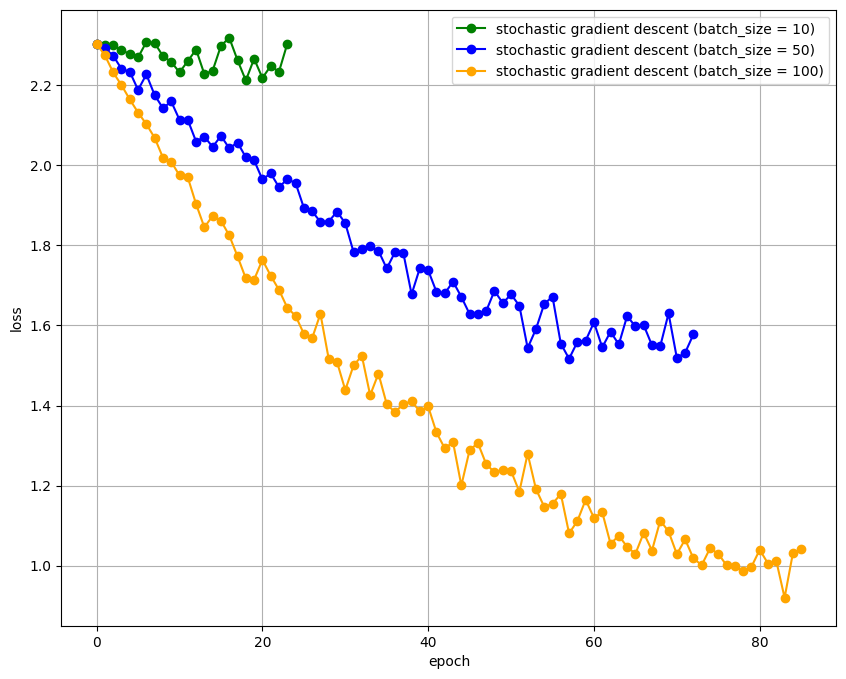

In [14]:
# evaluation of different batch size
bs = [10, 50, 100]
cl = ['green', 'blue', 'orange']
# TODO: different learning rate for different batch size
lr = 1.0e-2
fig, ax = plt.subplots(figsize=(10, 8))

for i in range(len(bs)):

    print('---------------------------------------')
    print('batch_size =', bs[i])
    W, b, loss_SGD = LogisticRegression_SGD(X_train, y_train, bs[i], lr, eta = 2.0e-1, eps = 1.0e-4, max_epoch = 500)

    print('Loss:', loss_SGD[-1])

    #TODO
    logits_modified_train = compute_logits(X_train, W, b)
    probabilities_train = compute_probabilities(logits_modified_train)
    y_pred_train = np.argmax(probabilities_train, axis=1)
    prec_train = np.mean(y_pred_train == y_train)
    print('training precision =', prec_train)

    #TODO
    logits_modified_test = compute_logits(X_test, W, b)
    probabilities_test = compute_probabilities(logits_modified_test)
    y_pred_test = np.argmax(probabilities_test, axis=1)
    prec_test = np.mean(y_pred_test == y_test)
    print('test precision =', prec_test)

    plt.plot(loss_SGD, c = cl[i], ls = '-', marker = 'o', label = 'stochastic gradient descent (batch_size = ' + str(bs[i]) + ')')

plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

---------------------------------------
batch_size = 10
reduce learning rate to 0.0005
reduce learning rate to 0.00025
reduce learning rate to 0.000125
reduce learning rate to 6.25e-05
reduce learning rate to 3.125e-05
reduce learning rate to 1.5625e-05
Loss: 2.29729269272915
training precision = 0.1358574610244989
test precision = 0.14
---------------------------------------
batch_size = 50
Loss: 2.295404212022009
training precision = 0.7453600593912398
test precision = 0.7
---------------------------------------
batch_size = 100
Loss: 2.283607260470572
training precision = 0.8210838901262064
test precision = 0.7777777777777778


Text(0, 0.5, 'loss')

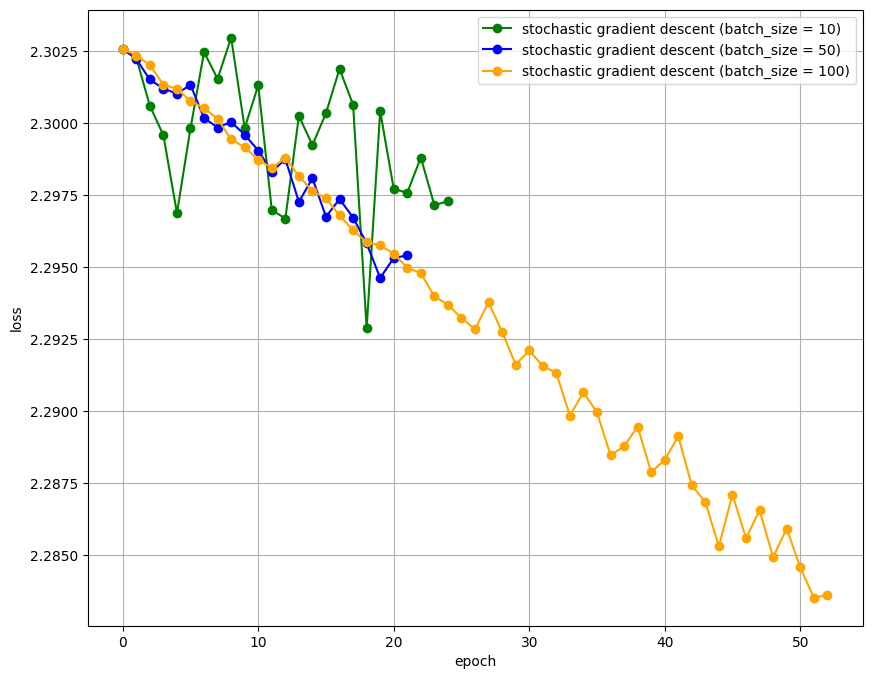

In [16]:
# tune the initial learning rate
# evaluation of different batch size
bs = [10, 50, 100]
cl = ['green', 'blue', 'orange']
# TODO: different learning rate for different batch size
lr = [1.0e-3, 2.0e-4, 1.0e-4]
fig, ax = plt.subplots(figsize=(10, 8))

for i in range(len(bs)):

    print('---------------------------------------')
    print('batch_size =', bs[i])
    W, b, loss_SGD = LogisticRegression_SGD(X_train, y_train, bs[i], lr[i], eta = 2.0e-1, eps = 1.0e-4, max_epoch = 500)

    print('Loss:', loss_SGD[-1])

    #TODO
    logits_modified_train = compute_logits(X_train, W, b)
    probabilities_train = compute_probabilities(logits_modified_train)
    y_pred_train = np.argmax(probabilities_train, axis=1)
    prec_train = np.mean(y_pred_train == y_train)
    print('training precision =', prec_train)

    #TODO
    logits_modified_test = compute_logits(X_test, W, b)
    probabilities_test = compute_probabilities(logits_modified_test)
    y_pred_test = np.argmax(probabilities_test, axis=1)
    prec_test = np.mean(y_pred_test == y_test)
    print('test precision =', prec_test)

    plt.plot(loss_SGD, c = cl[i], ls = '-', marker = 'o', label = 'stochastic gradient descent (batch_size = ' + str(bs[i]) + ')')

plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')